# –û—Ç—Ç–æ–∫. 

–î–∞—Ç–∞—Å–µ—Ç –æ–± –æ—Ç—Ç–æ–∫–µ –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ –≤ —Ç–µ–ª–µ–∫–æ–º–µ. 

–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è ‚Äì churn (–∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –æ—Ç—Ç–æ–∫–∞).

–ù—É–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—â—É—é –æ—Ç—Ç–æ–∫, –æ—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —ç—Ç–æ–π –º–æ–¥–µ–ª–∏.

## 1) –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –∏ –¥–∞–Ω–Ω—ã–µ

In [161]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')
import pydotplus
from IPython.display import Image
from six import StringIO 
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

import os

In [3]:
churn = pd.read_csv('/work/churn.csv')

In [4]:
churn = churn[['age', 'annualincome', 'calldroprate', 'callfailurerate',
       'customerid', 'customersuspended', 'education',
       'gender', 'homeowner', 'maritalstatus', 'monthlybilledamount',
       'numberofcomplaints', 'numberofmonthunpaid',
       'numdayscontractequipmentplanexpiring', 'occupation',
       'penaltytoswitch', 'state', 'totalminsusedinlastmonth',
       'unpaidbalance', 'usesinternetservice', 'usesvoiceservice',
       'percentagecalloutsidenetwork', 'totalcallduration',
       'avgcallduration', 'churn']]

## 2) –ó–Ω–∞–∫–æ–º–∏–º—Å—è –∏ –ø–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ.

In [5]:
churn.head(5)

age  annualincome  calldroprate  callfailurerate  customerid  \
0   12        168147          0.06             0.00           1   
1   12        168147          0.06             0.00           1   
2   42         29047          0.05             0.01           2   
3   42         29047          0.05             0.01           2   
4   58         27076          0.07             0.02           3   

  customersuspended               education  gender homeowner maritalstatus  \
0               Yes  Bachelor or equivalent    Male       Yes        Single   
1               Yes  Bachelor or equivalent    Male       Yes        Single   
2               Yes  Bachelor or equivalent  Female       Yes        Single   
3               Yes  Bachelor or equivalent  Female       Yes        Single   
4               Yes    Master or equivalent  Female       Yes        Single   

   ...  penaltytoswitch  state  totalminsusedinlastmonth  unpaidbalance  \
0  ...              371     WA                        15             19   
1  ...              371     WA                        15             19   
2  ...               43     WI                       212             34   
3  ...               43     WI                       212             34   
4  ...              403     KS                       216            144   

  usesinternetservice  usesvoiceservice percentagecalloutsidenetwork  \
0                  No                No                         0.82   
1                  No                No                         0.82   
2                  No               Yes                         0.27   
3                  No               Yes                         0.27   
4                  No                No                         0.48   

   totalcallduration  avgcallduration churn  
0               5971              663     0  
1               3981              995     0  
2               7379              737     0  
3               1729              432     0  
4               3122              624     0  

[5 rows x 25 columns]

–ü–æ—Å–∫–æ–ª—å–∫—É –¥–∞—Ç–∞—Å–µ—Ç –±—ã–ª –≤–∑—è—Ç –Ω–∞ –ø—Ä–æ—Å—Ç–æ—Ä–∞—Ö –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞ –Ω—É–∂–Ω–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –æ —á—ë–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ. Let's start! :) 

In [6]:
churn.columns.values

array(['age', 'annualincome', 'calldroprate', 'callfailurerate',
       'customerid', 'customersuspended', 'education', 'gender',
       'homeowner', 'maritalstatus', 'monthlybilledamount',
       'numberofcomplaints', 'numberofmonthunpaid',
       'numdayscontractequipmentplanexpiring', 'occupation',
       'penaltytoswitch', 'state', 'totalminsusedinlastmonth',
       'unpaidbalance', 'usesinternetservice', 'usesvoiceservice',
       'percentagecalloutsidenetwork', 'totalcallduration',
       'avgcallduration', 'churn'], dtype=object)

- 'age' - –ª–æ–≥–∏—á–Ω–æ, —á—Ç–æ —ç—Ç–æ –≤–æ–∑—Ä–∞—Å—Ç

- 

- 'customerid' - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–ª–∏–µ–Ω—Ç–∞

- 'customersuspended' - –ø—Ä–∏–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã–π –∫–ª–∏–µ–Ω—Ç

- 

- 

- 'homeowner' - –¥–æ–º–æ–≤–ª–∞–¥–µ–ª–µ—Ü

- 'maritalstatus' - —Å–µ–º–µ–π–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ

- 

- 

- 

- 

- 

- 'usesvoiceservice' - –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≥–æ–ª–æ—Å–æ–≤—ã—Ö —É—Å–ª—É–≥

- 'percentagecalloutsidenetwork' -–ø—Ä–æ—Ü–µ–Ω—Ç –∑–≤–æ–Ω–∫–æ–≤ –≤–Ω–µ —Å–µ—Ç–∏ 

- 'totalcallduration' - –æ–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–æ–≤

–¢–µ–ø–µ—Ä—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

In [7]:
# –ü—Ä–æ–≤–µ—Ä–∏–º —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö
churn.dtypes

age                                       int64
annualincome                              int64
calldroprate                            float64
callfailurerate                         float64
customerid                                int64
customersuspended                        object
education                                object
gender                                   object
homeowner                                object
maritalstatus                            object
monthlybilledamount                       int64
numberofcomplaints                        int64
numberofmonthunpaid                       int64
numdayscontractequipmentplanexpiring      int64
occupation                               object
penaltytoswitch                           int64
state                                    object
totalminsusedinlastmonth                  int64
unpaidbalance                             int64
usesinternetservice                      object
usesvoiceservice                        

In [8]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ percentagecalloutsidenetwork –≤ —á–∏—Å–ª–æ–≤–æ–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö.
churn.percentagecalloutsidenetwork = pd.to_numeric(churn.percentagecalloutsidenetwork, errors='coerce')
churn.isnull().sum()

age                                     0
annualincome                            0
calldroprate                            0
callfailurerate                         0
customerid                              0
customersuspended                       0
education                               0
gender                                  0
homeowner                               0
maritalstatus                           0
monthlybilledamount                     0
numberofcomplaints                      0
numberofmonthunpaid                     0
numdayscontractequipmentplanexpiring    0
occupation                              0
penaltytoswitch                         0
state                                   0
totalminsusedinlastmonth                0
unpaidbalance                           0
usesinternetservice                     0
usesvoiceservice                        0
percentagecalloutsidenetwork            0
totalcallduration                       0
avgcallduration                   

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –Ω–µ—Ç, –∫—Ä—É—Ç–æ :)

In [9]:
# –£–¥–∞–ª—è—é –∞–π–¥–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
churn2 = churn.iloc[:,1:]

# –ü—Ä–µ–¥–∏–∫—Ç–æ—Ä –≤ –±–∏–Ω–∞—Ä–Ω—É—é 
churn2['churn'].replace(to_replace='Yes', value=1, inplace=True)
churn2['churn'].replace(to_replace='No',  value=0, inplace=True)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É—é –≥–æ—Ä—è—á–∏–º –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º
churn_dummies = pd.get_dummies(churn2)
churn_dummies.head()

annualincome  calldroprate  callfailurerate  customerid  \
0        168147          0.06             0.00           1   
1        168147          0.06             0.00           1   
2         29047          0.05             0.01           2   
3         29047          0.05             0.01           2   
4         27076          0.07             0.02           3   

   monthlybilledamount  numberofcomplaints  numberofmonthunpaid  \
0                   71                   0                    7   
1                   71                   0                    7   
2                    8                   1                    4   
3                    8                   1                    4   
4                   16                   0                    2   

   numdayscontractequipmentplanexpiring  penaltytoswitch  \
0                                    96              371   
1                                    96              371   
2                                    14               43   
3                                    14               43   
4                                    55              403   

   totalminsusedinlastmonth  ...  state_VA  state_VT  state_WA  state_WI  \
0                        15  ...         0         0         1         0   
1                        15  ...         0         0         1         0   
2                       212  ...         0         0         0         1   
3                       212  ...         0         0         0         1   
4                       216  ...         0         0         0         0   

   state_WV  state_WY  usesinternetservice_No  usesinternetservice_Yes  \
0         0         0                       1                        0   
1         0         0                       1                        0   
2         0         0                       1                        0   
3         0         0                       1                        0   
4         0         0                       1                        0   

   usesvoiceservice_No  usesvoiceservice_Yes  
0                    1                     0  
1                    1                     0  
2                    0                     1  
3                    0                     1  
4                    1                     0  

[5 rows x 84 columns]

<AxesSubplot: >

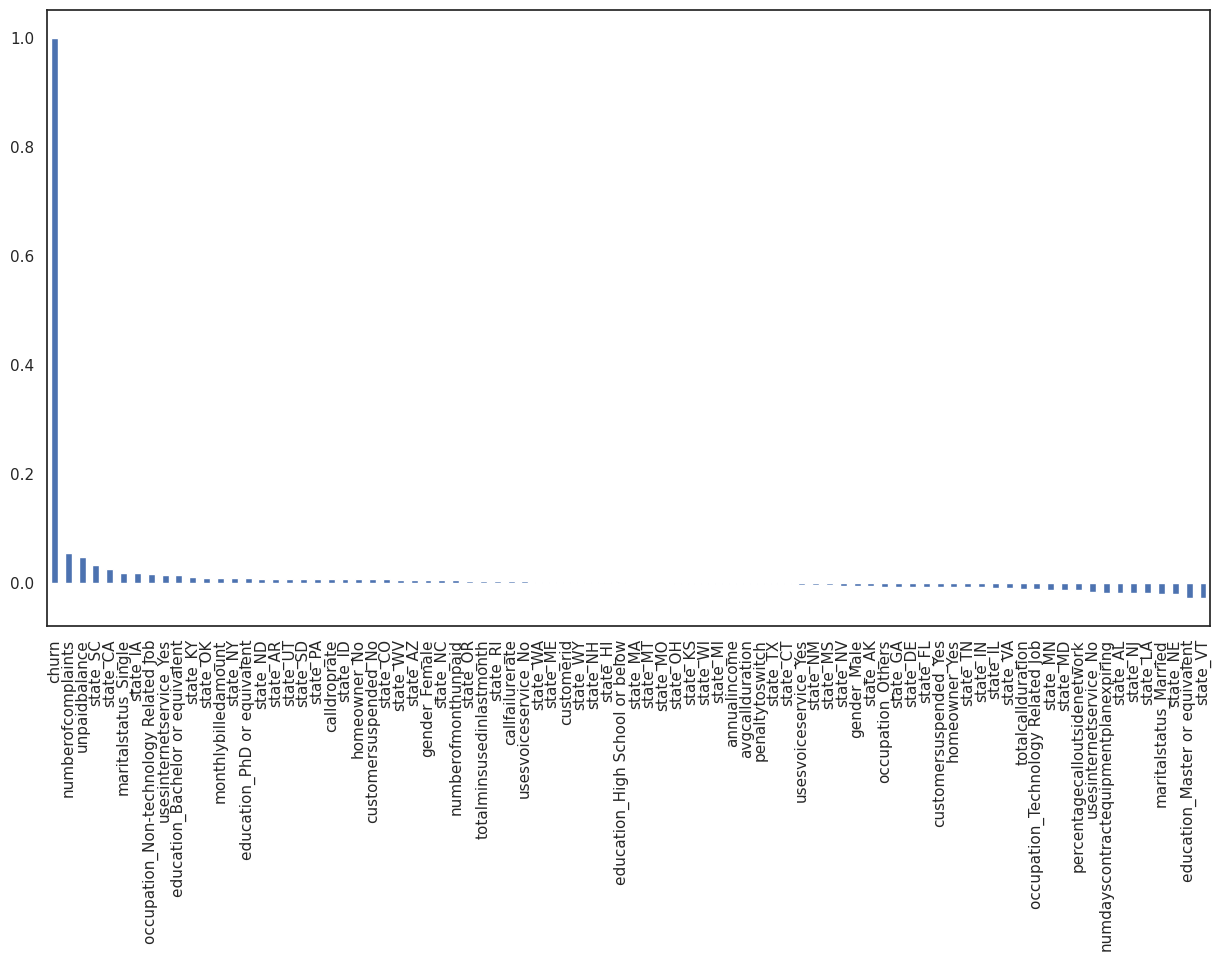

In [10]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é "—Åhurn" —Å –¥—Ä—É–≥–∏–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏:
plt.figure(figsize=(15,8))
churn_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∂–∞–ª–æ–± = 'numberofcomplaints', –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–π –±–∞–ª–∞–Ω—Å = 'unpaidbalance', –µ–∂–µ–º–µ—Å—è—á–Ω–∞—è —Å—É–º–º–∞ —Å—á–µ—Ç–∞ = 'monthlybilledamount' –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –æ—Ç—Ç–æ–∫–æ–º. –í —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –¥–Ω–µ–π –¥–æ –∏—Å—Ç–µ—á–µ–Ω–∏—è –∫–æ–Ω—Ç—Ä–∞–∫—Ç–∞ = 'numdayscontractequipmentplanexpiring' –∏ –¥—Ä—É–≥–∏–µ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç.

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ —Ç–∞–∫–∏–µ —É—Å–ª—É–≥–∏, –∫–∞–∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞, —Å—Ç–µ–ø–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –±–∞–∫–∞–ª–∞–≤—Ä –∏–ª–∏ PhD, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ —à—Ç–∞—Ç—ã, –Ω–µ –æ—Ç—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–π –∫–ª–∏–µ–Ω—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ —Å–≤—è–∑–∞–Ω—ã —Å –ø–æ—Ç–æ–∫–æ–º. –ê —Å—Ç–µ–ø–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è -- –º–∞–≥–∏—Å—Ç—Ä –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ. –ö–∞—Å–∞—Ç–µ–ª—å–Ω–æ —à—Ç–∞—Ç–æ–≤ -- –≤–æ–∑–º–æ–∂–Ω–æ –≤ –∫–∞–∫–∏—Ö-—Ç–æ —à—Ç–∞—Ç–∞—Ö —Å—Ç–æ–∏—Ç –Ω–∞–∏–ª—É—á—à–µ–µ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ, –ø–æ—ç—Ç–æ–º—É —Å–≤—è–∑—å —Ç–∞–º –ª—É—á—à–µ –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ç—Ç–æ–∫ –º–µ–Ω—å—à–µ. –¢–∞–∫–∂–µ —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –ª—é–±—ã–º–∏ –¥—Ä—É–≥–∏–º–∏ –≤–Ω–µ—à–Ω–∏–º–∏ –ø—Ä–∏—á–∏–Ω–∞–º–∏, –æ—Ç –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ–≤, –¥–æ —Ü–∏—Ñ—Ä–æ–≤–∏–∑–∞—Ü–∏–∏ –≤ —Ç–æ–º –∏–ª–∏ –∏–Ω–æ–º –Ω–∞—Å–µ–ª–µ–Ω–Ω–æ–º –ø—É–Ω–∫—Ç–µ. –¢–∞–∫–∂–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ —Ç–æ, —á—Ç–æ –ø–æ–ª –º—É–∂—Å–∫–æ–π –∏–ª–∏ –∂–µ–Ω—Å–∫–∏–π –Ω–µ–º–Ω–æ–≥–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –∏ –∂–µ–Ω—Å–∫–∏–π –ø–æ–ª –≤–ª–∏—è–µ—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ, –∞ –º—É–∂—Å–∫–æ–π –Ω–∞–æ–±–æ—Ä–æ—Ç -- –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ.

## 3) –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–ù–∞—á–Ω—É —Å –∏–∑—É—á–µ–Ω–∏—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –ª—É—á—à–µ –ø–æ–Ω—è—Ç—å –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –∏, –≤–æ–∑–º–æ–∂–Ω–æ, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –≥–∏–ø–æ—Ç–µ–∑—ã. –°–Ω–∞—á–∞–ª–∞ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –∞ –∑–∞—Ç–µ–º –Ω–∞—Ä–µ–∂–µ–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –∫—É—Å–æ—á–∫–∏, —á—Ç–æ–±—ã –≤—ã—è–≤–∏—Ç—å –∫–∞–∫–∏–µ-–ª–∏–±–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏.

A) –î–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –∏ –ø—Ä—è–º—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è - 'gender' = –ø–æ–ª, 'homeowner'= –¥–æ–º–æ–≤–ª–∞–¥–µ–ª–µ—Ü, 'maritalstatus' = —Å–µ–º–µ–π–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ, 'education' - –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, 'occupation' = –ø—Ä–æ—Ñ–µ—Å—Å–∏—è, –∫–∞–∫–æ–π —à—Ç–∞—Ç. –ò –∫–æ–Ω–µ—á–Ω–æ -- –∂–µ –≤–æ–∑—Ä–∞—Å—Ç!

–ü–æ–ª –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.

In [33]:
group = churn['gender'].value_counts()
gtype = ['–ñ–µ–Ω—â–∏–Ω–∞', '–ú—É–∂—á–∏–Ω–∞']

fig = px.bar(x = gtype, y = group.values, 
       color = group.index, text = group.values, 
       title = '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É')

fig.update_layout( xaxis_title = "–ü–æ–ª", yaxis_title = "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
fig.show()

–ñ–µ–Ω—â–∏–Ω —á—É—Ç—å –±–æ–ª—å—à–µ, –Ω–æ –≤—Å—ë –∂–µ –ø–µ—Ä–µ–∫–æ—Å –Ω–µ —Ç–∞–∫–æ–π —Å–∏–ª—å–Ω—ã–π.

–î–æ–º–æ–≤–ª–∞–¥–µ–ª–µ—Ü (–¥–∞ –∏–ª–∏ –Ω–µ—Ç).

In [34]:
homeowner = churn['homeowner'].value_counts()
fig = px.pie(values = homeowner.values, names = homeowner.index, 
            title = '–î–æ–º–æ–≤–ª–∞–¥–µ–ª–µ—Ü')
fig.show()

–£ –Ω–∞—Å –µ—Å—Ç—å –ª–∏—à—å 20% –¥–æ–º–æ–≤–ª–∞–¥–µ–ª—å—Ü–µ–≤. –ó–Ω–∞—á–∏—Ç –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ª—é–¥–µ–π –∞—Ä–µ–Ω–¥—É—é—Ç —Å–≤–æ–µ –∂–∏–ª—å–µ.

–°–µ–º–µ–π–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ

–£–∑–Ω–∞—é –∫–∞–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ç–∞–º –µ—Å—Ç—å:

In [35]:
maritalstatus = churn['maritalstatus'].value_counts()
fig = px.pie(values = maritalstatus.values, names = maritalstatus.index, 
            title = '–°–µ–º–µ–π–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ')
fig.show()

–û–¥–∏–Ω–æ–∫–∏—Ö 51%, –∑–∞–º—É–∂–Ω–∏—Ö(–∂–µ–Ω–∞—Ç—ã—Ö) 49%. –ü–µ—Ä–µ–∫–æ—Å–∞ –Ω–µ—Ç.

–ü—Ä–æ—Ñ–µ—Å—Å–∏—è.

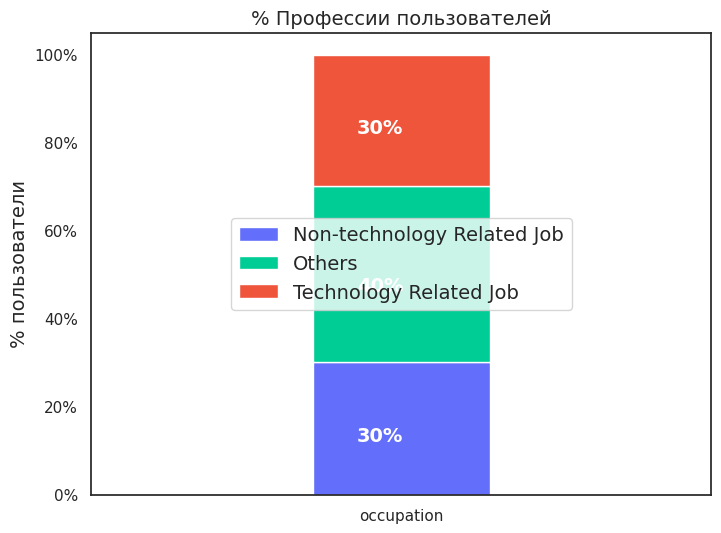

In [26]:
ch2 = pd.melt(churn, id_vars=['customerid'], value_vars=['occupation'])
ch3 = ch2.groupby(['variable','value']).count().unstack()
ch3 = ch3*100/len(churn)
colors = ['#636EFB','#00CC96', '#EF553B']
ax = ch3.loc[:,'customerid'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                    width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏',size = 14)
ax.set_xlabel('')
ax.set_title('% –ü—Ä–æ—Ñ–µ—Å—Å–∏–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

30% –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Ä–∞–±–æ—Ç–∞—é—Ç –≤ —Å—Ñ–µ—Ä–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π, 30% —Ä–∞–±–æ—Ç–∞—é—Ç –Ω–µ –≤ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π —Å—Ñ–µ—Ä–µ –∏ 40% "–¥—Ä—É–≥–æ–µ". –ù–µ–º–Ω–æ–≥–æ —Å—Ç—Ä–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –Ω–µ –ø–æ —Ü–∏—Ñ—Ä–∞–º, –∞ —Å–∫–æ—Ä–µ–µ –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—è–º. –í–æ–∑–º–æ–∂–Ω–æ —á–∞—Å—Ç—å –ª—é–¥–µ–π –≤—Ö–æ–¥—è—â–∏—Ö –≤ —ç—Ç–∏ 40% –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç, –∞ —É—á–∞—Ç—Å—è. –¢—É—Ç —è –Ω–∏—á–µ–≥–æ –¥–µ–ª–∞—Ç—å –Ω–µ –±—É–¥—É, –ø–æ—Å–∫–æ–ª—å–∫—É —á—Ç–æ –∑–∞–∫–ª–∞–¥—ã–≤–∞–ª–∏—Å—å —Å–æ–∑–¥–∞—Ç–µ–ª—è–º–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø—Ä–∏ –Ω–µ–π–º–∏–Ω–≥–µ –Ω–µ –∏–∑–≤–µ—Å—Ç–Ω–æ. –í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ —Å—É–ø–µ—Ä-–≤–∞–∂–Ω–æ.

–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ.

In [38]:
education = churn['education'].value_counts()
fig = px.pie(values = education.values, names = education.index, 
            title = '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ')
fig.show()

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ —Ç–æ, —á—Ç–æ –ø–æ—á—Ç–∏ –ø–æ–ª–æ–≤–∏–Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–º–µ–µ—Ç —Ç–æ–ª—å–∫–æ —à–∫–æ–ª—å–Ω–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Å—Ç—É–ø–µ–Ω–µ–π –≤—ã—Å—à–µ–≥–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è –ª–æ–≥–∏—á–Ω—ã–º, –ø–æ—Ç–æ–º—É —á—Ç–æ –ø–æ—á—Ç–∏ 30% –ª—é–¥–µ–π –∏–º–µ–µ—Ç –±–∞–∫–∞–ª–∞–≤—Ä—Å–∫—É—é —Å—Ç—É–ø–µ–Ω—å –∏ –¥–∞–ª–µ–µ –ø–æ —É–º–µ–Ω—å—à–µ–Ω–∏—é. –í —Ü–µ–ª–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç—É–ø–µ–Ω–µ–π –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ.

–í–æ–∑—Ä–∞—Å—Ç.

In [39]:
fig = px.box(y = churn['age'], title = '–≤–æ–∑—Ä–∞—Å—Ç')
fig.show()

–°–æ–≥–ª–∞—Å–Ω–æ –¥–∞–Ω–Ω–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É –º–µ–¥–∏–∞–Ω–æ–π –≤–æ–∑—Ä–∞—Å—Ç -- 45 –ª–µ—Ç. 25% –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –º–ª–∞–¥—à–µ 28 –ª–µ—Ç –∏ 25% –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å—Ç–∞—Ä—à–µ62 –ª–µ—Ç. –í—ã–±—Ä–æ—Å–æ–≤ –Ω–µ—Ç. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç -- 79 –ª–µ—Ç, –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π -- 12. –ß—Ç–æ –≤ —Ü–µ–ª–æ–º —Å—Ç—Ä–∞–Ω–Ω–æ, —Ä–∞–∑–≤–µ –º–æ–∂–Ω–æ –≤ —Ç–∞–∫–æ–º –≤–æ–∑—Ä–∞—Å—Ç–µ –∑–∞–∫–ª—é—á–∞—Ç—å –∫–æ–Ω—Ç—Ä–∞–∫—Ç—ã?.. –ù–æ –ø–æ—Å–∫–æ–ª—å–∫—É —ç—Ç–æ –¥–∞—Ç–∞—Å–µ—Ç –ø–æ –°–®–ê –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –≤—Å—ë –æ–∫–µ–π, —Ç–∞–∫ –∫–∞–∫ —è –Ω–µ –∑–Ω–∞–∫–æ–º–∞ —Å –∏—Ö –∑–∞–∫–æ–Ω–æ–¥–∞—Ç–µ–ª—å—Å—Ç–≤–æ–º. 

–®—Ç–∞—Ç.

In [52]:
residence = churn['state'].value_counts()

top10_state = residence[:10]
fig = px.bar(y = top10_state.values, x = top10_state.index, 
            color = top10_state.index, text = top10_state.values,
            title = '–¢–æ–ø 10 —à—Ç–∞—Ç–æ–≤')

fig.update_layout( xaxis_title = "–ú–µ—Å—Ç–æ–Ω–∞—Ö–æ–∂–¥–µ–Ω–∏–µ", yaxis_title = "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
fig.show()

B) –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å—á–µ—Ç–µ –∫–ª–∏–µ–Ω—Ç–∞.

–°—á–∏—Ç–∞—é, —á—Ç–æ –≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥ -- —ç—Ç–æ –¥–æ—Ö–æ–¥ –∫–æ–º–ø–∞–Ω–∏–∏ –æ—Ç —á–µ–ª–æ–≤–µ–∫–∞.–ü–æ—Å–∫–æ–ª—å–∫—É —Ç–µ–ª–µ–∫–æ–º –∫–æ–º–ø–∞–Ω–∏—è –≤—Ä—è–¥ –ª–∏ —Ä–∞—Å–ø–æ–ª–∞–≥–∞–µ—Ç –¥–∞–Ω–Ω—ã–º–∏ –∏ –¥–æ—Ö–æ–¥–µ —á–µ–ª–æ–≤–µ–∫–∞. –ì–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —Å–µ–º–µ–π–Ω–æ–≥–æ –ø–æ–ª–æ–∂–µ–Ω–∏—è.

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∂–∞–ª–æ–± –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–ª–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.

In [40]:
churn.numberofcomplaints.unique ()

array([0, 1, 3, 2])

In [45]:
numcomp = churn.groupby(['numberofcomplaints','gender']).size()
fig = go.Figure(data = [
    go.Bar(name = 0, x = numcomp[0].index,
           y = numcomp[0].values, text = numcomp[0].values),
    go.Bar(name = 1, x = numcomp[1].index,
           y = numcomp[1].values, text = numcomp[1].values),
    go.Bar(name = 3, x = numcomp[3].index,
           y = numcomp[3].values, text = numcomp[3].values),
    go.Bar(name = 2, x = numcomp[2].index,
           y = numcomp[2].values, text = numcomp[2].values),
])
fig.update_layout(xaxis_tickangle = -45, title = '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∂–∞–ª–æ–± –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–ª–∞')

fig.show()

–í —Ü–µ–ª–æ–º, –ø–µ—Ä–µ–∫–æ—Å–æ–≤ –Ω–∏–∫–∞–∫–∏—Ö –Ω–µ—Ç, —Ä–∞–∑–≤–µ —á—Ç–æ –∂–µ–Ω—â–∏–Ω—ã –∂–∞–ª—É—é—Ç—Å—è —á—É—Ç—å –±–æ–ª—å—à–µ, —á–µ–º –º—É–∂—á–∏–Ω—ã.

–î–æ—Ö–æ–¥–æ–º —Å—á–∏—Ç–∞—é –¥–æ—Ö–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–Ω–µ—Å–ª–∏ –∫–æ–º–ø–∞–Ω–∏–∏ –ª—é–¥–∏. T–æ–ø 20 —à—Ç–∞—Ç–æ–≤ –ø–æ —Ä–∞–∑–º–µ—Ä—É –¥–æ—Ö–æ–¥–∞:

In [55]:
ann = churn.groupby(['annualincome', 'state']).size().reset_index()
ann = ann[-25:]
fig = px.bar(x = ann['state'], y = ann['annualincome'],
            text = ann['annualincome'], color = ann['annualincome'])

fig.update_layout( xaxis_title = "–®—Ç–∞—Ç", yaxis_title = "–î–æ—Ö–æ–¥")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'T–æ–ø 20 —à—Ç–∞—Ç–æ–≤ –ø–æ —Ä–∞–∑–º–µ—Ä—É –¥–æ—Ö–æ–¥–∞')

–ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–π –±–∞–ª–∞–Ω—Å –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏:

In [57]:
churn.occupation.unique ()

array(['Technology Related Job', 'Non-technology Related Job', 'Others'],
      dtype=object)

In [62]:
occup = churn[['occupation','unpaidbalance']]
tech = occup.loc[occup['occupation'] == 'Technology Related Job']
nonTech = occup.loc[occup['occupation'] == 'Non-technology Related Job']
other = occup.loc[occup['occupation'] == 'Others']
hist_data = [tech['unpaidbalance'], nonTech['unpaidbalance'], other['unpaidbalance']]
group_labels = ['—Å—Ñ–µ—Ä–∞ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π', '–Ω–µ —Å—Ñ–µ—Ä–∞ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π', '–¥—Ä—É–≥–æ–µ']

means = [tech['unpaidbalance'].mean(), nonTech['unpaidbalance'].mean(), other['unpaidbalance'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = '–°—Ä–µ–¥–Ω–∏–π –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–π –±–∞–ª–∞–Ω—Å –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏'))

fig1.update_layout(title = '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –±–∞–ª–∞–Ω—Å–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏')
fig2.update_layout( xaxis_title = "–ü—Ä–æ—Ñ–µ—Å—Å–∏—è", yaxis_title = "–°—Ä–µ–¥–Ω—è—è –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–π –±–∞–ª–∞–Ω—Å")
fig1.show()
fig2.show()

–ù–µ–¥–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ –±–∞–ª–∞–Ω—Å—ã –≤ —Ü–µ–ª–æ–º —Å—Ö–æ–∂–∏ –º–µ–∂–¥—É –ø—Ä–æ—Ñ–µ—Å—Å–∏—è–º–∏. –ï—Å—Ç—å –¥–≤–∞ –ø–∏–∫–∞ –∏ –æ–Ω–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –≤–∞—Ä—å–∏—Ä—É—é—Ç—Å—è –æ–∫–æ–ª–æ 66¬±2 –∏ 192¬±2.

C) –î–∞–≤–∞–π—Ç–µ —Ç–µ–ø–µ—Ä—å —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —É—Å–ª—É–≥, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –∫–ª–∏–µ–Ω—Ç–∞–º–∏

In [63]:
usesinternetservice = churn['usesinternetservice'].value_counts()
fig = px.pie(values = usesinternetservice.values, names = usesinternetservice.index, 
            title = '–ò—Å–ø–æ–ª—å–∑—É—é—Ç –∏–Ω—Ç–µ—Ä–Ω–µ—Ç')
fig.show()

In [64]:
usesvoiceservice = churn['usesvoiceservice'].value_counts()
fig = px.pie(values = usesvoiceservice.values, names = usesvoiceservice.index, 
            title = '–ò—Å–ø–æ–ª—å–∑—É—é—Ç –≥–æ–ª–æ—Å–æ–≤—É—é —Å–≤—è–∑—å')
fig.show()

–ú–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —É—Å–ª—É–≥–∏ —Ç–µ–ª–µ–∫–æ–º-–ø—Ä–æ–≤–∞–π–¥–µ—Ä–∞.

In [65]:
customersuspended = churn['customersuspended'].value_counts()
fig = px.pie(values = customersuspended.values, names = customersuspended.index, 
            title = '–ü—Ä–∏–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã–π –∫–ª–∏–µ–Ω—Ç')
fig.show()

–¢–µ–ø–µ—Ä—å –≤—Å—ë —è—Å–Ω–æ. –í –¥–∞—Ç–∞—Å–µ—Ç–µ –≤–µ—Ä–æ—è—Ç–Ω–µ–µ –≤—Å–µ–≥–æ –æ—Ç–∫–∞–∑–Ω–∏–∫–∏ –∫–æ–º–ø–∞–Ω–∏–∏.

D) –î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (churn) –∏ –ø–æ–π–º–µ–º –µ–µ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —Å –¥—Ä—É–≥–∏–º–∏ –≤–∞–∂–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –∫–∞–∫ —ç—Ç–æ –±—ã–ª–æ –≤—ã—è–≤–ª–µ–Ω–æ –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ.

In [66]:
churn.churn.unique ()

array([0, 1])

In [67]:
group = churn['churn'].value_counts()
gtype = [0, 1]

fig = px.bar(x = gtype, y = group.values, 
       color = group.index, text = group.values, 
       title = '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç—Ç–æ–∫—É')

fig.update_layout( xaxis_title = "–û—Ç—Ç–æ–∫", yaxis_title = "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
fig.show()

–ò—Å—Ö–æ–¥—è –∏–∑ –ø—Ä–æ—à–ª—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞ –∏–ª–∏ –≥–æ–ª–æ—Å–æ–≤—ã—Ö —É—Å–ª—É–≥ –¥–µ–ª–∞–µ–º –≤—ã–≤–æ–¥, —á—Ç–æ 1=–æ—Å—Ç–∞–ª—Å—è, –∞ 0=—É—à–µ–ª.

–û—Ç—Ç–æ–∫ –∏ –ø–æ–ª

In [68]:
numcomp = churn.groupby(['churn','gender']).size()
fig = go.Figure(data = [
    go.Bar(name = 0, x = numcomp[0].index,
           y = numcomp[0].values, text = numcomp[0].values),
    go.Bar(name = 1, x = numcomp[1].index,
           y = numcomp[1].values, text = numcomp[1].values),
])
fig.update_layout(xaxis_tickangle = -45, title = '–û—Ç—Ç–æ–∫ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–ª–∞')

fig.show()

–ü–µ—Ä–µ–∫–æ—Å–æ–≤ –∫–∞–∫–∏—Ö-—Ç–æ —è–≤–Ω—ã—Ö —Ç–∞–∫–∂–µ –Ω–µ—Ç. –ü–æ—Å–∫–æ–ª—å–∫—É –∂–µ–Ω—â–∏–Ω –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –≤ —Ü–µ–ª–æ–º –±—ã–ª–æ –±–æ–ª—å—à–µ, —Ç–æ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –Ω–µ–±–æ–ª—å—à–æ–π –ø–µ—Ä–µ–≤–µ—Å –≤ —Å—Ç–æ—Ä–æ–Ω—É –∂–µ–Ω—Å–∫–æ–≥–æ –ø–æ–ª–∞. –í —Ü–µ–ª–æ–º –∞–Ω–æ–º–∞–ª–∏–π –Ω–µ—Ç.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –æ—Ç—Ç–æ–∫ –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏—é

In [69]:
churn.occupation.unique ()

array(['Technology Related Job', 'Non-technology Related Job', 'Others'],
      dtype=object)

In [72]:
numcomp = churn.groupby(['occupation','churn']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Technology Related Job', x = numcomp['Technology Related Job'].index,
           y = numcomp['Technology Related Job'].values, text = numcomp['Technology Related Job'].values),
    go.Bar(name = 'Non-technology Related Job', x = numcomp['Non-technology Related Job'].index,
           y = numcomp['Non-technology Related Job'].values, text = numcomp['Non-technology Related Job'].values),
    go.Bar(name = 'Others', x = numcomp['Others'].index,
           y = numcomp['Others'].values, text = numcomp['Others'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = '–û—Ç—Ç–æ–∫ –∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏—è')

fig.show()

–í–æ—Ç —Ç—É—Ç —á—Ç–æ-—Ç–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–µüî• –°—Ä–µ–¥–∏ —É—à–µ–¥—à–∏—Ö –ø—Ä–∏–º–µ—Ä–Ω–æ–µ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑ —Å—Ñ–µ—Ä—ã —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –∏ –Ω–µ –∏–∑ —Å—Ñ–µ—Ä—ã —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏, –æ–¥–Ω–∞–∫–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ "–¥—Ä—É–≥–æ–µ". –°—Ä–µ–¥–∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –Ω–µ—Ç —Ç–∞–∫–æ–≥–æ —è—Ä–∫–æ–≥–æ —É–≤–µ–ª–∏—á–µ–Ω–∏—è —á–∏—Å–ª–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª—é–¥–µ–π —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é: –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –≤ —Å—Ñ–µ—Ä–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π, –¥–∞–ª–µ–µ –≤ –Ω–µ—Ç–ø—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π —Å—Ñ–µ—Ä–µ –∏ —Å–∞–º–æ–µ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑ —Å—Ñ–µ—Ä—ã "–¥—Ä—É–≥–æ–µ".

–û—Ç—Ç–æ–∫ –ø–æ —à—Ç—Ä–∞—Ñ–∞–º –∑–∞ –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ.

Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —à—Ç—Ä–∞—Ñ–æ–≤ –ø—Ä–∏ –ø–µ—Ä–µ–∫–ª—é—á–µ–Ω–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ—Ç—Ç–æ–∫–∞')

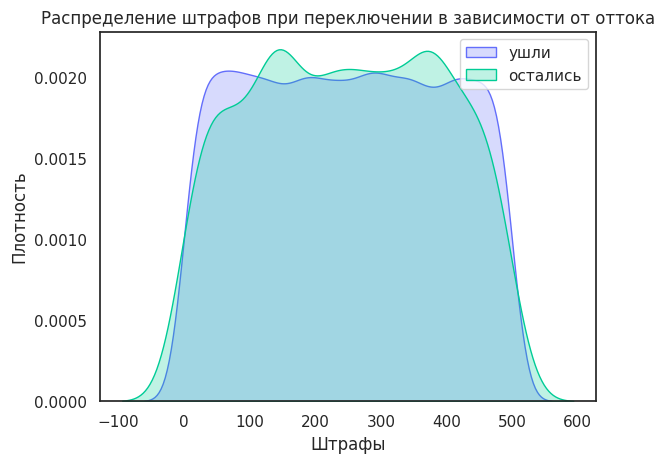

In [78]:
ax = sns.kdeplot(churn.penaltytoswitch[(churn["churn"] == 0) ],
                color='#636EFB', fill=True)
ax = sns.kdeplot(churn.penaltytoswitch[(churn["churn"] == 1) ],
                ax =ax, color='#00CC96', fill=True)
ax.legend(["—É—à–ª–∏","–æ—Å—Ç–∞–ª–∏—Å—å"],loc='upper right')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
ax.set_xlabel('–®—Ç—Ä–∞—Ñ—ã')
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —à—Ç—Ä–∞—Ñ–æ–≤ –ø—Ä–∏ –ø–µ—Ä–µ–∫–ª—é—á–µ–Ω–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ—Ç—Ç–æ–∫–∞')

## 4) –°—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª–∏!

### 1. Logistic Regression

In [80]:
# –î–∞–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –≥–æ—Ä—è—á–µ–≥–æ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è
y = churn_dummies['churn'].values
X = churn_dummies.drop(columns = ['churn'])

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –æ—Ç 0 –¥–æ 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [82]:
# –°–æ–∑–¥–∞—é Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [127]:
model = LogisticRegression(solver='lbfgs', max_iter=50 )
result = model.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [128]:
prediction_test = model.predict(X_test)

# Prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.9091353199804592


In [129]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9089410040307805, 0.9091353199804592)

–ü—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–µ—Ç.

AxesSubplot(0.125,0.11;0.775x0.77)


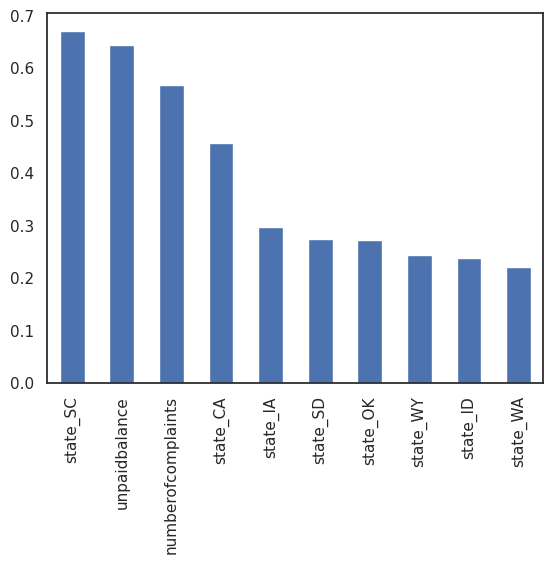

In [92]:
# –ü–æ–ª—É—á–µ–Ω–∏—è –≤–µ—Å–æ–≤ –≤—Å–µ—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


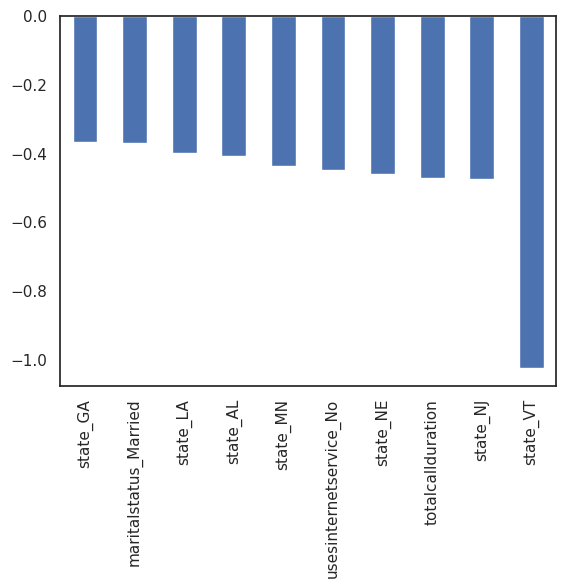

In [93]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

–ù–µ–±–æ–ª—å—à–∏–µ –≤—ã–≤–æ–¥—ã –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–º–µ—é—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é —Å–≤—è–∑—å —Å –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (—Åhurn), –∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ - –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é. –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç—Ç–æ–∫–∞ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è —Å —Ä–æ—Å—Ç–æ–º —ç—Ç–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –î–∞–≤–∞–π—Ç–µ –ø–æ–¥—ã—Ç–æ–∂–∏–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∏–∂–µ:

- –≤—ã—Å–æ–∫–∏–π –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–π –±–∞–ª–∞–Ω—Å, —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∂–∞–ª–æ–± –≤–µ–¥–µ—Ç –∫ –æ—Ç–∫–∞–∑—É –æ—Ç —É—Å–ª—É–≥–∏. –ò —ç—Ç–æ –≤ —Ü–µ–ª–æ–º –ª–æ–≥–∏—á–Ω–æ. –í–µ—Ä–æ—è—Ç–Ω–µ–µ –≤—Å–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –Ω–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω—ã —É—Å–ª—É–≥–∞–º–∏, –ª–∏–±–æ –Ω–µ –∏–º–µ—é—Ç —Å—Ä–µ–¥—Å—Ç–≤ –∏—Ö –æ–ø–ª–∞—Ç–∏—Ç—å.

- –ò—Å—Ö–æ–¥—è –∏–∑ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —à—Ç–∞—Ç—ã SC, CA, IA, SD, OK, WY, ID, WA - —á–∞—â–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –æ—Ç–∫–∞–∑—ã–≤–∞—é—Ç—Å—è –æ—Ç —É—Å–ª—É–≥. –ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —ç—Ç–æ —à—Ç–∞—Ç ID —á–∞—â–µ –ø—Ä–∏–Ω–æ—Å–∏—Ç –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –¥–æ—Ö–æ–¥–∞. –¢–∞–∫–∂–µ —à—Ç–∞—Ç—ã IA, OK -- –≤–æ—à–ª–∏ –≤ —Ç–æ–ø-20 —à—Ç–∞—Ç–æ–≤ —Å –±–æ–ª—å—à–æ–π –ø—Ä–∏–±—ã–ª—å—é. –í–æ–∑–º–æ–∂–Ω–æ —Ç–∞–º –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –æ—Ç —ç—Ç–æ–≥–æ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∫–∞–∑–æ–≤. –î–∞–Ω–Ω–æ–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å. 

- –ò—Å—Ö–æ–¥—è –∏–∑ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —à—Ç–∞—Ç—ã GA, AL, LA, MN, NE, NJ, VT -- –º–µ–Ω—å—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –æ—Ç–∫–∞–∑—ã–≤–∞—é—Ç—Å—è –æ—Ç —É—Å–ª—É–≥. GA, AL, NE -- –≤–æ—à–ª–∏ –≤ —Ç–æ–ø-20 —Å–∞–º—ã—Ö –ø—Ä–∏–±—ã–ª—å–Ω—ã—Ö —à—Ç–∞—Ç–æ–≤.

- –ï—Å–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –∂–µ–Ω–∞—Ç(–∑–∞–º—É–∂–µ–º), —Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç—Ç–æ–∫–∞ —Å–Ω–∏–∂–∞–µ—Ç—Å—è. –¢–∞–∫–∂–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç—Ç–æ–∫–∞ —Å–Ω–∏–∂–∞–µ—Ç—Å—è –µ—Å–ª–∏ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –±–æ–ª—å—à–∞—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–æ–≤ –∏–ª–∏ –æ–Ω –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –∏–Ω—Ç–µ—Ä–Ω–µ—Ç.

### 2. Tree

In [98]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train,y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9092463661903017, 0.9084025403028823)

–ü—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–µ –≤–∏–∂—É.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



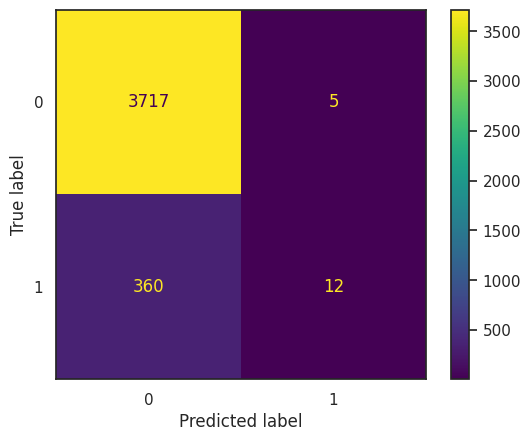

In [120]:
tree_pred = tree.predict(X_test)
plot_confusion_matrix(tree, X_test, y_test, display_labels = [0, 1])

–ù–∞—Ä–∏—Å—É–µ–º –¥–µ—Ä–µ–≤–æ:

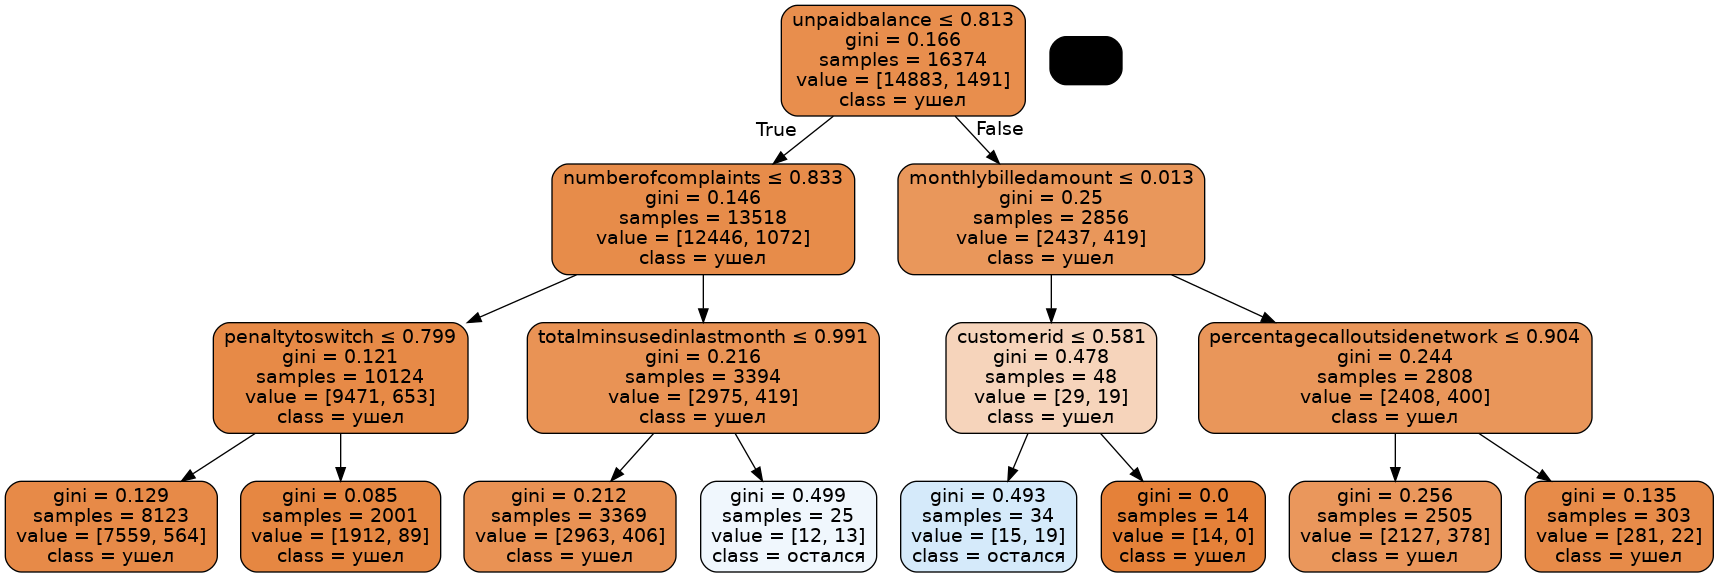

In [108]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=["—É—à–µ–ª", "–æ—Å—Ç–∞–ª—Å—è"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

–ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è unpaidbalance = 0.7, numbercomplaints = 0.9, totalminsusedinlastmonth = 0.1 —Ç–æ –æ–Ω —É–π–¥–µ—Ç.

### 3. Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

1 —Å–ø–æ—Å–æ–±:

In [140]:
def search_param(model, param, X_train, y_train, X_test, y_test, area=range(1, 11), msg=True, plot=True, seed=None):
    import matplotlib.pyplot as plt
    import time
    score_list = []
    if msg:
        print('#    —Ç–æ—á–Ω–æ—Å—Ç—å    –≤—Ä–µ–º—è')
    for abc in area:
        start = time.time()
        rfc = eval(model + '(' + param + '=' + str(abc) + ', random_state=' + str(seed) + ')')
        rfc.fit(X_train, y_train)
        s = rfc.score(X_test, y_test)
        end = time.time()
        score_list.append(s)
        if msg:
            print("%-3d %10f  %7f" % (abc, s, end - start))
    if plot:
        plt.plot(list(area), score_list)
    return list(area)[score_list.index(max(score_list))]

#    —Ç–æ—á–Ω–æ—Å—Ç—å    –≤—Ä–µ–º—è
1     0.891060  0.166126
2     0.925256  0.265848
3     0.932829  0.428113
4     0.924768  0.511917
5     0.939179  0.598733
6     0.932584  0.732264
7     0.937225  0.827682
8     0.932340  0.949366
9     0.939668  0.874298
10    0.934538  1.161459
11    0.941622  1.308204
12    0.937225  1.414706
13    0.943332  1.576173
14    0.935027  1.590644
15    0.941378  1.736455
16    0.934783  1.673280
17    0.939912  1.914989
18    0.933317  1.882231
19    0.939179  1.903444
20    0.936004  2.223321
21    0.939912  2.291487
22    0.937225  2.313771
23    0.941622  2.368066
24    0.937714  2.676840
25    0.940889  2.607325
26    0.939179  2.697117
27    0.941133  3.048408
28    0.937714  3.019372
29    0.941622  3.100013
30    0.939179  2.994316
31    0.942599  3.388089
32    0.938935  3.406000
33    0.943087  3.353547
34    0.940401  3.966099
35    0.943332  3.555630
36    0.939179  4.128516
37    0.942599  3.964362
38    0.941378  4.027274
39    0.943576

49

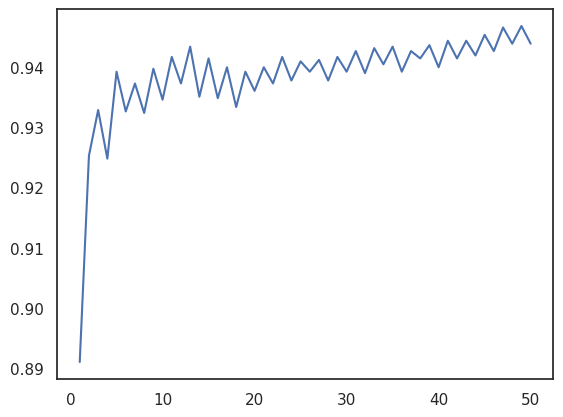

In [141]:
# –ø–æ–∏—Å–∫ n_estimators -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤ –≤ –ª–µ—Å—É

search_param('RandomForestClassifier', 'n_estimators', X_train, y_train, X_test, y_test, area=range(1, 51), seed= 15 )

#    —Ç–æ—á–Ω–æ—Å—Ç—å    –≤—Ä–µ–º—è
1     0.909135  1.326158
2     0.909135  1.852158
3     0.909135  2.405225
4     0.909135  2.719586
5     0.909135  3.311056
6     0.909135  3.878865
7     0.909135  4.410071
8     0.909135  4.786283
9     0.909135  5.396725
10    0.909135  5.836900
11    0.909135  6.361223
12    0.909135  7.162047
13    0.909624  7.154166
14    0.909868  7.925536
15    0.909868  8.129574
16    0.911578  8.156682
17    0.912311  9.091200
18    0.914021  8.805379
19    0.914998  9.685809
20    0.916952  9.418343
21    0.922570  9.703896
22    0.925256  9.883665
23    0.926478  10.087228
24    0.931119  9.772124


24

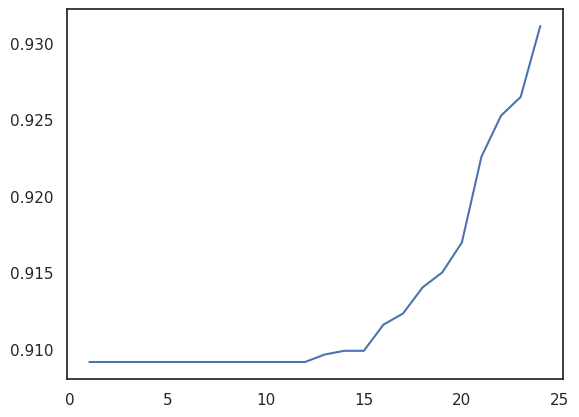

In [142]:
# –ø–æ–∏—Å–∫ max_depth -- –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≥–ª—É–±–∏–Ω—ã
search_param('RandomForestClassifier', 'max_depth', X_train, y_train, X_test, y_test, range(1, 25), seed=15)

#    —Ç–æ—á–Ω–æ—Å—Ç—å    –≤—Ä–µ–º—è
2     0.943576  11.235557
3     0.935271  11.114244
4     0.926478  10.862893
5     0.922325  10.393728
6     0.919150  10.523697
7     0.914998  10.728179
8     0.915242  11.091054
9     0.913288  10.851002


2

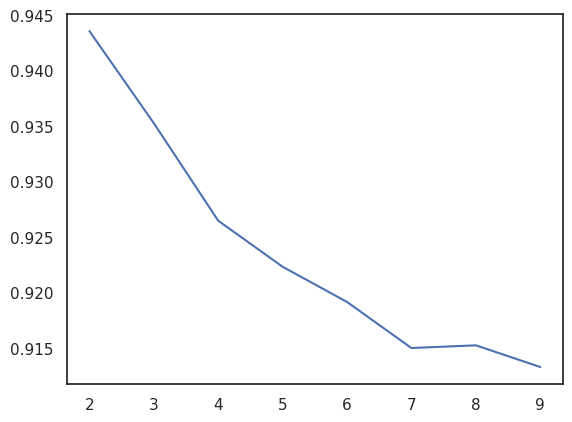

In [143]:
# –ø–æ–∏—Å–∫ min_samples_split -- –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª-–≤–æ –≤—ã–±–æ—Ä–æ–∫, –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è 
search_param('RandomForestClassifier', 'min_samples_split', X_train, y_train, X_test, y_test, range(2, 10), seed=15)

#    —Ç–æ—á–Ω–æ—Å—Ç—å    –≤—Ä–µ–º—è
1     0.943576  10.787763
2     0.914509  10.563513
3     0.910357  10.201414
4     0.909135  10.431373
5     0.909135  9.400041
6     0.909135  9.330292
7     0.909135  8.968007
8     0.909135  8.983164
9     0.909135  9.087968


1

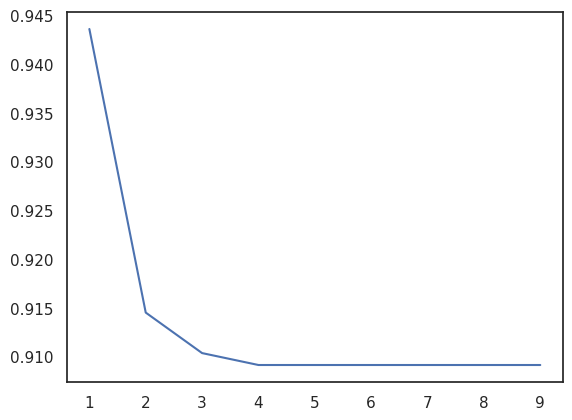

In [144]:
# –ø–æ–∏—Å–∫ min_samples_leaf -- –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª-–≤–æ –ø—Ä–∏–º–µ—Ä–æ–≤, —Ç—Ä–µ–±—É–µ–º–æ–µ –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –≤ –ª–∏—Å—Ç–æ–≤–æ–º —É–∑–ª–µ
search_param('RandomForestClassifier', 'min_samples_leaf', X_train, y_train, X_test, y_test, range(1, 10), seed=15)

–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è: –ò—Å–ø–æ–ª—å–∑—É—é –ø–µ—Ä–µ–∫—Ä–µ—Å—Ç–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É, —á—Ç–æ–±—ã –≤—ã—è–≤–∏—Ç—å –Ω–∞–∏–ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã. 

In [147]:
randFCl = RandomForestClassifier(random_state=15)
param = {'n_estimators': [i for i in range(38, 51)], 'max_depth': [i for i in range(20, 25)]}
gscv =  GridSearchCV(randFCl, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 65 candidates, totalling 195 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22, 23, 24],
                         'n_estimators': [38, 39, 40, 41, 42, 43, 44, 45, 46,
                                          47, 48, 49, 50]},
             verbose=1)

In [148]:
gscv.best_params_

{'max_depth': 24, 'n_estimators': 44}

–°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å –ø–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º:

<AxesSubplot: >

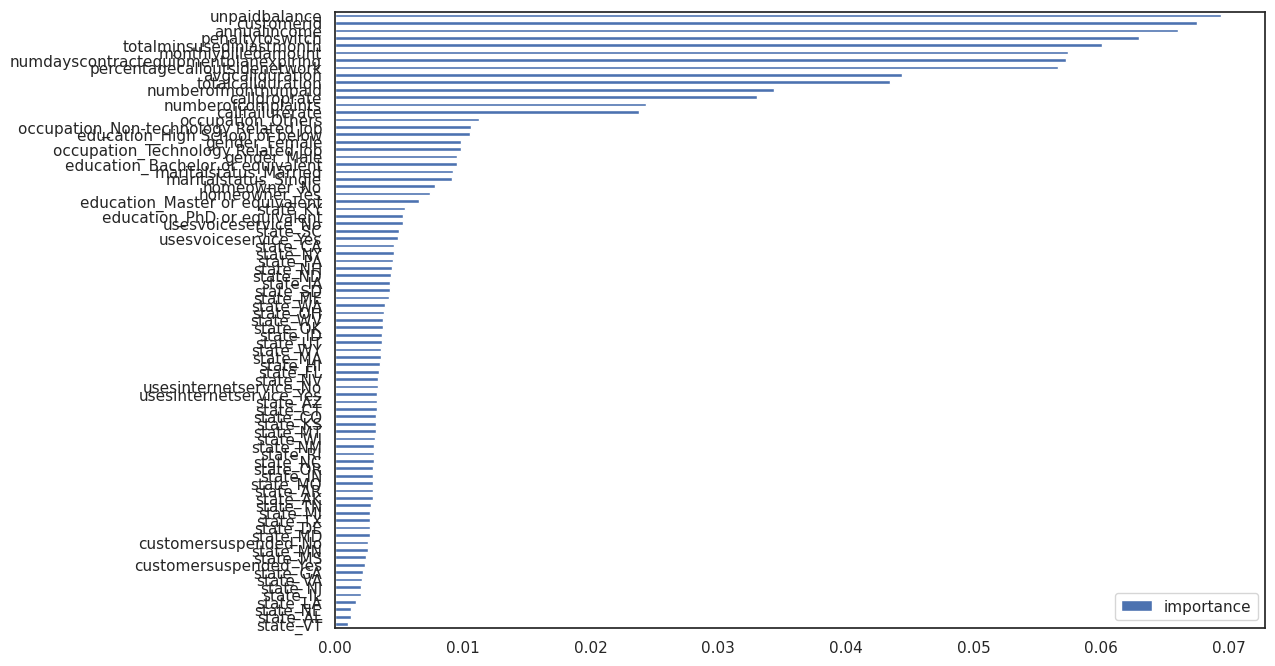

In [149]:
best_c = gscv.best_estimator_
imp = pd.DataFrame(best_c.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

–ó–¥–µ—Å—å –µ—Å—Ç—å –≤–∞–∂–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ–Ω–∏ —Ä–∞–∑–º–µ—â–µ–Ω—ã –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏. –°–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ -- –Ω–∞–≤–µ—Ä—Ö—É.

In [150]:
print(best_c.score(X_train, y_train), best_c.score(X_test, y_test))

0.9943202638329058 0.929408891060088


–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ —Ç–æ, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –∑–¥–µ—Å—å —Ö–æ—Ä–æ—à–µ–µ, –Ω–æ —è —Å—á–∏—Ç–∞—é, —á—Ç–æ –µ—Å—Ç—å –Ω–µ–±–æ–ª—å—à–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è.

2 —Å–ø–æ—Å–æ–±:

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_features='auto', max_leaf_nodes=30,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=50)

In [110]:
model_rf.score(X_train, y_train), model_rf.score(X_test, y_test)

(0.9089410040307805, 0.9091353199804592)

–¢–æ–∂–µ —Ö–æ—Ä–æ—à–æ, –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ç–∞–∫–∂–µ –Ω–µ –≤–∏–∂—É. –ù–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –¥–∞–∂–µ —á—É—Ç—å-—á—É—Ç—å –ª—É—á—à–µ.

–ö–∞–∫ –∏ –æ–∂–∏–¥–∞–ª–æ—Å—å –≤—Ç–æ—Ä—ã–º —Å–ø–æ—Å–æ–±–æ–º –∫–∞—á–µ—Å—Ç–≤–æ –±—É–¥–µ—Ç —Ö—É–∂–µ. –ò–∑ –¥–≤—É—Ö RF –≤—ã–±–∏—Ä–∞—é –ø–µ—Ä–≤—É—é.

### 4. Support Vecor Machine (SVM)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [130]:
model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)

SVC(kernel='linear')

In [131]:
model_svm.score(X_train, y_train), model_svm.score(X_test, y_test)

(0.9089410040307805, 0.9091353199804592)

In [132]:
preds = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9091353199804592

–¢–æ–∂–µ –≤—Å—ë —Ö–æ—Ä–æ—à–æ.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



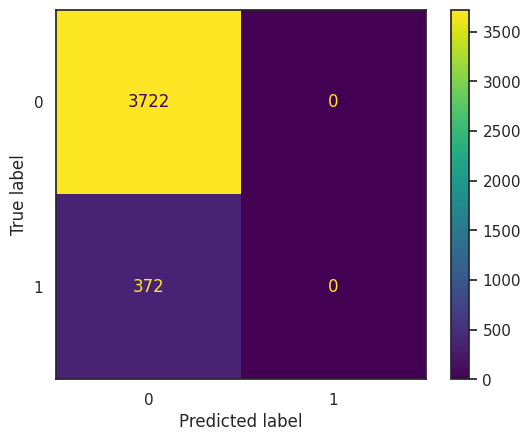

In [133]:
plot_confusion_matrix(model_svm, X_test, y_test, display_labels = [0, 1])

### 5. ADA Boost

In [134]:
modelADA = AdaBoostClassifier()

modelADA.fit(X_train,y_train)

AdaBoostClassifier()

In [137]:
print (modelADA.score(X_train, y_train), modelADA.score(X_test, y_test))

0.9086967143031636 0.9088910600879335


–ü—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–µ –≤–∏–∂—É.

### 6. XG Boost

In [139]:
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

print (modelXGB.score(X_train, y_train), modelXGB.score(X_test, y_test))

0.9857090509344082 0.9386907669760626


–í–æ—Ç –∑–¥–µ—Å—å –µ—Å—Ç—å –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏, –Ω–æ —è —Å—á–∏—Ç–∞—é —ç—Ç–æ –Ω–µ —Å–∏–ª—å–Ω–æ –∫—Ä–∏—Ç–∏—á–Ω–æ. –¢–µ–º –±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —ç—Ç–æ–π –º–æ–¥–µ–ª–∏ –≤—Å—ë –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–æ–µ.

### 7. –ê–Ω—Å–∞–±–ª—å

VOTING

In [154]:
modelVote = VotingClassifier(estimators=[('lr', model), ('tr', tree), ('rf1', best_c), ('rf2', model_rf), ('svm', model_svm), ('ada', modelADA), ('xgb', modelXGB)], voting='hard')
modelVote.fit(X_train,y_train)

train_mv = modelVote.score(X_train,y_train)
test_mv = modelVote.score(X_test,y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



In [157]:
print('–Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –º–∞—Å—Å–∏–≤–µ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é {0}, \
–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–∞—Å—Å–∏–≤–µ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é {1:6.2f}'.format \
(train_mv, test_mv) )

–Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –º–∞—Å—Å–∏–≤–µ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é 0.9089410040307805, –∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–∞—Å—Å–∏–≤–µ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é   0.91


## –í—ã–≤–æ–¥ –ø–æ –≤—Å–µ–º

- Accuracy: 0.91 (+/- 0.00) [LR]

- Accuracy: 0.91 (+/- 0.00) [Tree]

- Accuracy: 0.92 (+/- 0.00) [RF 1 —Å–ø–æ—Å–æ–±]

- Accuracy: 0.91 (+/- 0.00) [RF 2 —Å–ø–æ—Å–æ–±]

- Accuracy: 0.91 (+/- 0.00) [SVM]

- Accuracy: 0.91 (+/- 0.00) [ADABoost]

- Accuracy: 0.91 (+/- 0.00) [XGBoost]

- Accuracy: 0.91 (+/- 0.00) [Voting]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c2d4a28-4ba0-4474-94ac-254dc4ba316c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>